In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime as dt
import dataframe_image as dfi
import time
import re
import math


#Set notebook execution timer
a = time.time()

In [2]:
%matplotlib inline

In [3]:
#Load clinical data into a Dataframe
df = pd.read_csv("Resources/Clinical Data Analyst Sample Data.csv")
pd.set_option("display.max_columns", None)
df

,MBR_ID,CLAIM_TRANS_ID,BILL_NPI,BILL_PROV_ID,SRV_RNDR_NPI,ATTEND_NPI,PRESC_ORD_NPI,CLAIM_TYPE_CD,CLAIM_TYPE_DESC,COS_CD,COS_DESC,SRV_DT,PMT_DT,ADMIT_DT,DSCH_DT,SRC_CD,PROC_CD,CLAIM_CLASS_CD,PAID_AMOUNT,LATEST_TRANS_IND,PRIM_DX_CD,PRIM_DX_DESC,MBR_AGE_ON_DOS,
0,DDDDDDDD,30000367.0,NaN,1111375.0,NaN,NaN,NaN,M,MANAGED CARE CAPITATION,220.0,PCPS: CAPITATION PROVIDER,01/01/2016,01/18/2016,NaN,NaN,FFS,NaN,INSTITUTIONAL,861.50,Y,R69,NaN,61.0,
1,DDDDDDDD,30000370.0,NaN,2978054.0,NaN,NaN,NaN,T,TRANSPORTATION,603.0,TRANS: TAXI,01/07/2016,01/25/2016,NaN,NaN,FFS,S0215,PROFESSIONAL,10.80,Y,R69,"ILLNESS, UNSPECIFIED",61.0,
2,DDDDDDDD,30000370.0,NaN,2978054.0,NaN,NaN,NaN,T,TRANSPORTATION,603.0,TRANS: TAXI,01/07/2016,01/25/2016,NaN,NaN,FFS,A0100,PROFESSIONAL,2.00,Y,R69,"ILLNESS, UNSPECIFIED",61.0,
3,DDDDDDDD,30000373.0,1.902800e+09,354283.0,1.902800e+09,1.073627e+09,NaN,V,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,01/13/2016,01/26/2016,01/13/2016,01/13/2016,ENC,88112,INSTITUTIONAL,94.34,Y,NaN,FREQUENCY OF MICTURITION,61.0,
4,DDDDDDDD,30000373.0,1.902800e+09,354283.0,1.902800e+09,1.073627e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,01/13/2016,01/26/2016,01/13/2016,01/13/2016,ENC,87086,INSTITUTIONAL,10.08,Y,N390,"URINARY TRACT INFECTION, SITE NOT SPECIF",61.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

MBR_ID               object
CLAIM_TRANS_ID      float64
BILL_NPI            float64
BILL_PROV_ID        float64
SRV_RNDR_NPI        float64
ATTEND_NPI          float64
PRESC_ORD_NPI       float64
CLAIM_TYPE_CD        object
CLAIM_TYPE_DESC      object
COS_CD              float64
COS_DESC             object
SRV_DT               object
PMT_DT               object
ADMIT_DT             object
DSCH_DT              object
SRC_CD               object
PROC_CD              object
CLAIM_CLASS_CD       object
PAID_AMOUNT         float64
LATEST_TRANS_IND     object
PRIM_DX_CD           object
PRIM_DX_DESC         object
MBR_AGE_ON_DOS      float64
                     object
dtype: object

## Data Wrangling

In [5]:
#Drop all rows that have NaN across all columns
df = df.dropna(how='all')
df

,MBR_ID,CLAIM_TRANS_ID,BILL_NPI,BILL_PROV_ID,SRV_RNDR_NPI,ATTEND_NPI,PRESC_ORD_NPI,CLAIM_TYPE_CD,CLAIM_TYPE_DESC,COS_CD,COS_DESC,SRV_DT,PMT_DT,ADMIT_DT,DSCH_DT,SRC_CD,PROC_CD,CLAIM_CLASS_CD,PAID_AMOUNT,LATEST_TRANS_IND,PRIM_DX_CD,PRIM_DX_DESC,MBR_AGE_ON_DOS,
0,DDDDDDDD,30000367.0,NaN,1111375.0,NaN,NaN,NaN,M,MANAGED CARE CAPITATION,220.0,PCPS: CAPITATION PROVIDER,01/01/2016,01/18/2016,NaN,NaN,FFS,NaN,INSTITUTIONAL,861.50,Y,R69,NaN,61.0,
1,DDDDDDDD,30000370.0,NaN,2978054.0,NaN,NaN,NaN,T,TRANSPORTATION,603.0,TRANS: TAXI,01/07/2016,01/25/2016,NaN,NaN,FFS,S0215,PROFESSIONAL,10.80,Y,R69,"ILLNESS, UNSPECIFIED",61.0,
2,DDDDDDDD,30000370.0,NaN,2978054.0,NaN,NaN,NaN,T,TRANSPORTATION,603.0,TRANS: TAXI,01/07/2016,01/25/2016,NaN,NaN,FFS,A0100,PROFESSIONAL,2.00,Y,R69,"ILLNESS, UNSPECIFIED",61.0,
3,DDDDDDDD,30000373.0,1.902800e+09,354283.0,1.902800e+09,1.073627e+09,NaN,V,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,01/13/2016,01/26/2016,01/13/2016,01/13/2016,ENC,88112,INSTITUTIONAL,94.34,Y,NaN,FREQUENCY OF MICTURITION,61.0,
4,DDDDDDDD,30000373.0,1.902800e+09,354283.0,1.902800e+09,1.073627e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,01/13/2016,01/26/2016,01/13/2016,01/13/2016,ENC,87086,INSTITUTIONAL,10.08,Y,N390,"URINARY TRACT INFECTION, SITE NOT SPECIF",61.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,GGGGGGGG,30000518.0,1.548375e+09,2998805.0,1.548375e+09,1.003812e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,02/19/2016,06/06/2017,NaN,02/19/2016,ENC,83970,INSTITUTIONAL,98.98,Y,NaN,INFECT/INFLM REACTION DUE TO INTERNAL R,56.0,
351,GGGGGGGG,30000519.0,1.548375e+09,2998805.0,1.548375e+09,1.003812e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,02/19/2016,06/06/2017,NaN,02/19/2016,ENC,82306,INSTITUTIONAL,98.98,Y,T8453XD,INFECT/INFLM REACTION DUE TO INTERNAL R,56.0,
352,GGGGGGGG,30000519.0,1.548375e+09,2998805.0,1.548375e+09,1.003812e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,02/19/2016,06/06/2017,NaN,02/19/2016,ENC,82310,INSTITUTIONAL,98.98,Y,T8453XD,INFECT/INFLM REACTION DUE TO INTERNAL R,56.0,
353,GGGGGGGG,30000548.0,1.104073e+09,3254102.0,1.104073e+09,NaN,NaN,P,PRACTITIONER,460.0,PHYS SVC: PHYSICIAN SERVICES,02/03/2016,08/26/2017,NaN,NaN,ENC,99429,PROFESSIONAL,0.00,Y,S72002A,FRACTURE OF UNSP PART OF NECK OF LEFT FE,56.0,


In [6]:
#Save transformed dataset to new csv
df.to_csv("Resources/Transformed_dataset/Clinical_data_transformed.csv",index=False)

In [7]:
#Reformat date for PMT_DT
df['PMT_DT'] = pd.to_datetime(df['PMT_DT'])
df['PMT_DT']

C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     2016-01-18
1     2016-01-25
2     2016-01-25
3     2016-01-26
4     2016-01-26
         ...    
350   2017-06-06
351   2017-06-06
352   2017-06-06
353   2017-08-26
354   2017-08-24
Name: PMT_DT, Length: 355, dtype: datetime64[ns]

In [8]:
#format CLAIM_TRANS_ID to str
df['CLAIM_TRANS_ID']= df['CLAIM_TRANS_ID'].map(str).str[:-2]
df

C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MBR_ID,CLAIM_TRANS_ID,BILL_NPI,BILL_PROV_ID,SRV_RNDR_NPI,ATTEND_NPI,PRESC_ORD_NPI,CLAIM_TYPE_CD,CLAIM_TYPE_DESC,COS_CD,COS_DESC,SRV_DT,PMT_DT,ADMIT_DT,DSCH_DT,SRC_CD,PROC_CD,CLAIM_CLASS_CD,PAID_AMOUNT,LATEST_TRANS_IND,PRIM_DX_CD,PRIM_DX_DESC,MBR_AGE_ON_DOS,
0,DDDDDDDD,30000367,NaN,1111375.0,NaN,NaN,NaN,M,MANAGED CARE CAPITATION,220.0,PCPS: CAPITATION PROVIDER,01/01/2016,2016-01-18,NaN,NaN,FFS,NaN,INSTITUTIONAL,861.50,Y,R69,NaN,61.0,
1,DDDDDDDD,30000370,NaN,2978054.0,NaN,NaN,NaN,T,TRANSPORTATION,603.0,TRANS: TAXI,01/07/2016,2016-01-25,NaN,NaN,FFS,S0215,PROFESSIONAL,10.80,Y,R69,"ILLNESS, UNSPECIFIED",61.0,
2,DDDDDDDD,30000370,NaN,2978054.0,NaN,NaN,NaN,T,TRANSPORTATION,603.0,TRANS: TAXI,01/07/2016,2016-01-25,NaN,NaN,FFS,A0100,PROFESSIONAL,2.00,Y,R69,"ILLNESS, UNSPECIFIED",61.0,
3,DDDDDDDD,30000373,1.902800e+09,354283.0,1.902800e+09,1.073627e+09,NaN,V,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,01/13/2016,2016-01-26,01/13/2016,01/13/2016,ENC,88112,INSTITUTIONAL,94.34,Y,NaN,FREQUENCY OF MICTURITION,61.0,
4,DDDDDDDD,30000373,1.902800e+09,354283.0,1.902800e+09,1.073627e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,01/13/2016,2016-01-26,01/13/2016,01/13/2016,ENC,87086,INSTITUTIONAL,10.08,Y,N390,"URINARY TRACT INFECTION, SITE NOT SPECIF",61.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,GGGGGGGG,30000518,1.548375e+09,2998805.0,1.548375e+09,1.003812e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,02/19/2016,2017-06-06,NaN,02/19/2016,ENC,83970,INSTITUTIONAL,98.98,Y,NaN,INFECT/INFLM REACTION DUE TO INTERNAL R,56.0,
351,GGGGGGGG,30000519,1.548375e+09,2998805.0,1.548375e+09,1.003812e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,02/19/2016,2017-06-06,NaN,02/19/2016,ENC,82306,INSTITUTIONAL,98.98,Y,T8453XD,INFECT/INFLM REACTION DUE TO INTERNAL R,56.0,
352,GGGGGGGG,30000519,1.548375e+09,2998805.0,1.548375e+09,1.003812e+09,NaN,C,CLINIC,287.0,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,02/19/2016,2017-06-06,NaN,02/19/2016,ENC,82310,INSTITUTIONAL,98.98,Y,T8453XD,INFECT/INFLM REACTION DUE TO INTERNAL R,56.0,
353,GGGGGGGG,30000548,1.104073e+09,3254102.0,1.104073e+09,NaN,NaN,P,PRACTITIONER,460.0,PHYS SVC: PHYSICIAN SERVICES,02/03/2016,2017-08-26,NaN,NaN,ENC,99429,PROFESSIONAL,0.00,Y,S72002A,FRACTURE OF UNSP PART OF NECK OF LEFT FE,56.0,


# Research Question 1

In [9]:
#Filter df to dates between Jan 2016 and March 2016
df_q1 = df.loc[(df['PMT_DT'] >= '01/01/2016')
               & (df['PMT_DT'] <= '03/31/2016')]

#Check all unique values after filtering
df_q1['PMT_DT'].unique()

array(['2016-01-18T00:00:00.000000000', '2016-01-25T00:00:00.000000000',
       '2016-01-26T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-02-08T00:00:00.000000000', '2016-02-29T00:00:00.000000000',
       '2016-03-07T00:00:00.000000000', '2016-03-04T00:00:00.000000000',
       '2016-03-14T00:00:00.000000000', '2016-03-28T00:00:00.000000000',
       '2016-01-11T00:00:00.000000000', '2016-03-21T00:00:00.000000000',
       '2016-03-27T00:00:00.000000000', '2016-02-15T00:00:00.000000000',
       '2016-02-22T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-03-06T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2016-03-11T00:00:00.000000000', '2016-03-12T00:00:00.000000000',
       '2016-03-17T00:00:00.000000000', '2016-03-30T00:00:00.000000000',
       '2016-03-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
#Filter df to value "INSTITUTIONAL" in CLAIM_CLASS_CD
df_q1 = df.loc[(df['CLAIM_CLASS_CD'] == 'INSTITUTIONAL')]

#Check all unique values after filtering
df_q1['CLAIM_CLASS_CD'].unique()

array(['INSTITUTIONAL'], dtype=object)

In [11]:
df_q1_gb_ct = df_q1.groupby('CLAIM_TYPE_DESC')['PAID_AMOUNT'].sum().reset_index()
df_q1_gb_ct_styled = df_q1_gb_ct.style.background_gradient()
df_q1_gb_ct_styled

,CLAIM_TYPE_DESC,PAID_AMOUNT
0,CLINIC,3746.590000
1,HOME HEALTH AGENCY - PERSONAL CARE,5017.560000
2,INPATIENT,374149.290000
3,MANAGED CARE CAPITATION,22044.010000
4,RESIDENTIAL HEALTH CARE (NURSING HOME),44233.570000


In [12]:
df_q1_gb_ct_styled = df_q1.groupby(['CLAIM_TRANS_ID','MBR_ID','CLAIM_TYPE_DESC'])['PAID_AMOUNT'].agg(['sum','count']).reset_index().style.background_gradient()

#Export df as png
dfi.export(df_q1_gb_ct_styled,"DataFrames_and_Graphs/Claim_Class_Summary.png")
df_q1_gb_ct_styled

,CLAIM_TRANS_ID,MBR_ID,CLAIM_TYPE_DESC,sum,count
0,30000366,EEEEEEEE,MANAGED CARE CAPITATION,4773.490000,1
1,30000367,DDDDDDDD,MANAGED CARE CAPITATION,861.500000,1
2,30000367,FFFFFFFF,RESIDENTIAL HEALTH CARE (NURSING HOME),606.650000,5
3,30000367,GGGGGGGG,MANAGED CARE CAPITATION,466.080000,1
4,30000370,FFFFFFFF,HOME HEALTH AGENCY - PERSONAL CARE,256.520000,1
5,30000373,DDDDDDDD,CLINIC,104.420000,2
6,30000373,FFFFFFFF,CLINIC,737.100000,1
7,30000373,FFFFFFFF,RESIDENTIAL HEALTH CARE (NURSING HOME),727.980000,6
8,30000375,DDDDDDDD,MANAGED CARE CAPITATION,2731.900000,1
9,30000375,EEEEEEEE,MANAGED CARE CAPITATION,4773.490000,1


In [13]:
df_q1_gb_cos = df_q1.groupby('COS_DESC')['PAID_AMOUNT'].sum().reset_index()
df_q1_gb_cos_styled = df_q1_gb_cos.style.background_gradient()

df_q1_gb_cos_styled

,COS_DESC,PAID_AMOUNT
0,D&TCS: DIAGNOSTIC & TREATMENT CENTER SVCS (FSTNDG),5071.320000
1,"GROUPS: CHAIN PHARMACY (NOT PAYABLE, NOT ON BILL)",44781.000000
2,HHAS: CASE MANAGEMENT SERVICES,769.560000
3,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,2375.840000
4,HOS SVC: INPATIENT,374149.290000
5,PCPS: CAPITATION PROVIDER,22044.010000


In [14]:
df_q1_gb_cos_styled = df_q1.groupby(['CLAIM_TRANS_ID','MBR_ID','COS_DESC'])['PAID_AMOUNT'].agg(['sum','count']).reset_index().style.background_gradient()

#Export df as png
dfi.export(df_q1_gb_cos_styled,"DataFrames_and_Graphs/Category_of_Service_Summary.png")
df_q1_gb_cos_styled

,CLAIM_TRANS_ID,MBR_ID,COS_DESC,sum,count
0,30000366,EEEEEEEE,PCPS: CAPITATION PROVIDER,4773.490000,1
1,30000367,DDDDDDDD,PCPS: CAPITATION PROVIDER,861.500000,1
2,30000367,FFFFFFFF,D&TCS: DIAGNOSTIC & TREATMENT CENTER SVCS (FSTNDG),606.650000,5
3,30000367,GGGGGGGG,PCPS: CAPITATION PROVIDER,466.080000,1
4,30000370,FFFFFFFF,HHAS: CASE MANAGEMENT SERVICES,256.520000,1
5,30000373,DDDDDDDD,HOS SVC: HOSPITAL BASE OUTPATIENT SERVICES,104.420000,2
6,30000373,FFFFFFFF,D&TCS: DIAGNOSTIC & TREATMENT CENTER SVCS (FSTNDG),1465.080000,7
7,30000375,DDDDDDDD,PCPS: CAPITATION PROVIDER,2731.900000,1
8,30000375,EEEEEEEE,PCPS: CAPITATION PROVIDER,4773.490000,1
9,30000375,FFFFFFFF,D&TCS: DIAGNOSTIC & TREATMENT CENTER SVCS (FSTNDG),606.650000,5


In [15]:
#Create melted df for both column options
df_q1_melt = df_q1.groupby(['COS_DESC','CLAIM_TYPE_DESC'])['PAID_AMOUNT'].sum().reset_index()

#Export df as png
dfi.export(df_q1_melt,"DataFrames_and_Graphs/COS_ClaimType_Melted.png")

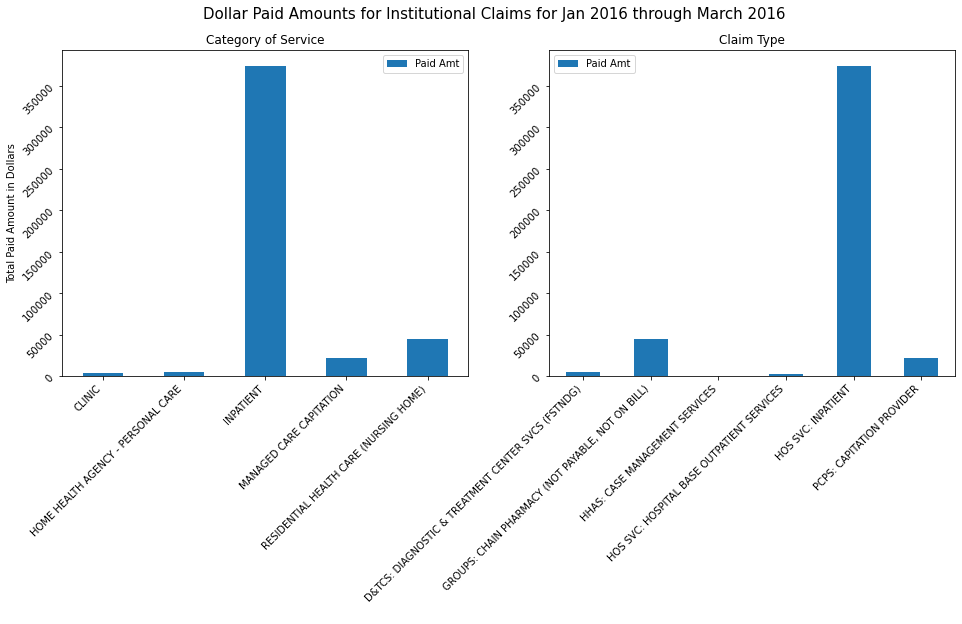

In [16]:
#Create subplot
fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(16, 6))

#add title
fig1.suptitle("Dollar Paid Amounts for Institutional Claims for Jan 2016 through March 2016", fontsize=15)

#add subplot titles
ax1.set_title('Category of Service')
ax2.set_title('Claim Type')

#plot bars for category of service
df_q1_gb_ct.plot(ax=ax1,
                 x= 'CLAIM_TYPE_DESC',
                 y= 'PAID_AMOUNT',
                 kind='bar', 
                 stacked=True,
                 xlabel= ' ',
                 ylabel= "Total Paid Amount in Dollars").legend(loc='best')

#Set label rotation
ax1.tick_params(labelleft=True,labelrotation=45)

#Set label alignment
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
    
#plot bars for claim type
df_q1_gb_cos.plot(ax=ax2,
                 x= 'COS_DESC',
                 y= 'PAID_AMOUNT',
                 kind='bar', 
                 stacked=True,
                 xlabel= ' ',
                 ylabel= "Total Paid Amount in Dollars").legend(loc='best')

#Set legend labels
ax1.legend(['Paid Amt'])
ax2.legend(['Paid Amt'])

#Set label rotation
ax2.tick_params(labelleft=True,labelrotation=45)

#Set label alignment
for tick in ax2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
    

# save the figure
plt.savefig('DataFrames_and_Graphs/COS_ClaimType_Graph.png', dpi=300, bbox_inches='tight')



## Research Question 1 Answer
### Category of Service: Inpatient
### Claim Type: HOS SVC: Inpatient

# Research Question 2

In [17]:
#Q2a
#The query identifies all adults (age 18-64) who were admitted more than 3 times for inpatient care 
#between the dates of 7/1/15 and 6/30/16 along with a count of admittance.
#The query also identifies all unique bills and healthcare facilities correlated to their care.

#Q2b
#The expected output is a matrix with several members with their respective bills and healthcare facilities.

#Q2c
#1. Date range (7/1/2015 through 6/30/2016)
#2. Only claims pertaining to "INPATIENT" care
#3. Age range (18-64)
#4. GROUPYBY works like 'unique' MBR_ID, BILL_NPI, NPI_NAME
#5. Filter to individuals with more than 3 inpatient care events.


# Research Question 3

In [18]:
q3_df = df.groupby(['CLAIM_TYPE_CD',"CLAIM_TYPE_DESC"])['MBR_ID'].count().reset_index()
q3_df

,CLAIM_TYPE_CD,CLAIM_TYPE_DESC,MBR_ID
0,A,REFERRED AMBULATORY,4
1,C,CLINIC,20
2,H,HOME HEALTH AGENCY - PERSONAL CARE,22
3,Hom,HOME HEALTH AGENCY - PERSONAL CARE,1
4,I,INPATIENT,31
5,L,LABORATORY,25
6,M,MANAGED CARE CAPITATION,8
7,N,MANAGED CARE CAPITATION,1
8,N,RESIDENTIAL HEALTH CARE (NURSING HOME),38
9,O,PRACTITIONER,1


In [19]:
len(q3_df.CLAIM_TYPE_CD.unique())

14

In [20]:
len(q3_df.CLAIM_TYPE_DESC.unique())

10

In [21]:
#Q3
#14
#10
#No gaps were found. However, some of the values do overlap overlap. I.e.: "N" or "Practioner"

# Research Question 4

In [22]:
#Q4a

#Get total length of column
tot_data_points = len(df)
tot_data_points

355

In [23]:
#Check for all possible values
df.ADMIT_DT.unique()

array([nan, '01/13/2016', '02/01/2012', '01/30/2016', '02/11/2016',
       '01/27/2016', '01/28/2016'], dtype=object)

In [24]:
#Get number of empty values in column
admit_dt_null_cnt =df.ADMIT_DT.isnull().sum(axis = 0)
admit_dt_null_cnt

303

In [25]:
#ADMIT_DT completenes
admit_dt_cr = 1-(admit_dt_null_cnt/tot_data_points)
admit_dt_cr

0.14647887323943665

In [26]:
#Check for all possible values
df.DSCH_DT.unique()

array([nan, '01/13/2016', '01/07/2016', '02/12/2016', '02/11/2016',
       '02/05/2016', '02/02/2016', '02/04/2016', '01/27/2016',
       '02/01/2016', '02/03/2016', '02/10/2016', '02/06/2016',
       '02/07/2016', '02/09/2016', '02/08/2016', '02/19/2016',
       '03/24/2016', '01/28/2016'], dtype=object)

In [27]:
#Get number of empty values in column
dsch_dt_null_cnt =df.DSCH_DT.isnull().sum(axis = 0)
dsch_dt_null_cnt

295

In [28]:
#ADMIT_DT completenes
dsch_dt_cr = 1-(dsch_dt_null_cnt/tot_data_points)
dsch_dt_cr

0.16901408450704225

In [29]:
#Possibilities
#1.Data collection error. #2 Patient was discharged the same day. 

# Research Question 5

In [30]:
# Codes that end with 1 pertain to right side of the body
# Codes that end with 2 pertain to the left side of the body
# Codes that end with 9 or 0 pertain to unspecified areas

### regex

In [31]:
# \d(?=\D*$)

# \d                      digits (0-9)
# (?=                      look ahead to see if there is:
#   \D*                      non-digits (all but 0-9) (0 or more
#                            times)
#   $                        before an optional \n, and the end of
#                            the string
# )                        end of look-ahead

#regex source: https://regex101.com/

In [39]:
#Create a df with the 2 columns needed and extract the last numerical character of PRIM_DX_CD
code_rate_df = df[['PRIM_DX_CD', 'PRIM_DX_DESC']]
code_rate_df['PRIM_DX_CD_lc'] = code_rate_df['PRIM_DX_CD'].str.extract(r'(\d(?=\D*$))')
code_rate_df.replace(np.nan,'',regex=True, inplace=True) #Remove nan values
code_rate_df=code_rate_df.drop(columns=['PRIM_DX_CD'])
code_rate_df

C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PRIM_DX_DESC,PRIM_DX_CD_lc
0,,9
1,"ILLNESS, UNSPECIFIED",9
2,"ILLNESS, UNSPECIFIED",9
3,FREQUENCY OF MICTURITION,
4,"URINARY TRACT INFECTION, SITE NOT SPECIF",0
...,...,...
350,INFECT/INFLM REACTION DUE TO INTERNAL R,
351,INFECT/INFLM REACTION DUE TO INTERNAL R,3
352,INFECT/INFLM REACTION DUE TO INTERNAL R,3
353,FRACTURE OF UNSP PART OF NECK OF LEFT FE,2


In [33]:
code1 = 0 #counts if PRIM_DX_CD_lc contains a '1' and if PRIM_DX_DESC contains the word RIGHT
code2 = 0 #counts if PRIM_DX_CD_lc contains a '2' and if PRIM_DX_DESC contains the word LEFT
code9 = 0 #counts if PRIM_DX_CD_lc contains a '1' and if PRIM_DX_DESC contains the word RIGHT
no_code = 0 #counts if no code was detected


#Iterate through each row to see if the code conforms horizontally across the rows of the dataframe
for index, row in code_rate_df.iterrows():
    if "1" in row['PRIM_DX_CD_lc'] and 'RIGHT' in row['PRIM_DX_DESC']:
        code1 += 1
    elif "2" in row['PRIM_DX_CD_lc'] and 'LEFT' in row['PRIM_DX_DESC']:
        code2 += 1
    elif "9" in row['PRIM_DX_CD_lc'] and ('UNSPECIFIED' or 'UNSP' in row['PRIM_DX_DESC']):
        code9 += 1
    else:
        no_code += 1

print(f"We have {code1} data points that conform to code1, {code2} data points that conform to code2, {code9} datapoints that conform to code9, and {no_code} data points with no code detected")

We have 9 data points that conform to code1, 16 data points that conform to code2, 183 datapoints that conform to code9, and 147 data points with no code detected


In [34]:
non_code_conforming_rate = (no_code/tot_data_points)
code_conforming_rate = 1 - non_code_conforming_rate
code_conforming_rate

0.5859154929577465

In [35]:
import icd10

empty_code = df.PRIM_DX_CD.isna().sum()
tot_data_points = 0
code_fnd = 0
code_not_fnt = 0

for index, row in df.iterrows():
    tot_data_points += 1
    if row['PRIM_DX_CD'] is not None:
        try:
            code = icd10.find(row['PRIM_DX_CD'])
            #print(code)
            if code == None:
                code_not_fnt += 1
            else:
                code_fnd += 1
        except:
            #print("Code Not Found")
            code_not_fnt += 1

print(f"We have a total of {tot_data_points} data points of which {empty_code} are null. Of the {tot_data_points-empty_code} codes reported, {code_fnd} conform to ICD-10 code standards. This leaves us with a {(code_fnd/(tot_data_points-empty_code)*100):.02f}% code conformity rate.")


We have a total of 355 data points of which 10 are null. Of the 345 codes reported, 340 conform to ICD-10 code standards. This leaves us with a 98.55% code conformity rate.


In [37]:
#Calculate total runtime of code
b= time.time()
c=b - a
print(f"This notebook took {c} seconds to execute")

This notebook took 4.200742959976196 seconds to execute
